In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

In [53]:


def generate_data(num_samples=100, noise_level=0.1):
    # Generate random features
    x1 = np.random.rand(num_samples) * 10  # Feature 1
    x2 = np.random.rand(num_samples) * 10  # Feature 2

    # Apply simple rules to create labels
    y = np.zeros(num_samples)

    # Decision boundaries
    # Rule 1: if x1 + x2 > 10 then class 1 else class 0
    y[(x1 + x2) > 10] = 1
    
    # Add noise
    x1 += np.random.normal(0, noise_level, num_samples)  # Adding noise to x1
    x2 += np.random.normal(0, noise_level, num_samples)  # Adding noise to x2

    # Clip labels to be binary
    y = np.clip(y, 0, 1)

    X = np.array([x1, x2])
    X = X.T

    return X, y


In [62]:
# Generate data
X_total, y_total = generate_data(num_samples=150, noise_level=4)


X = X_total[:-60]
y = y_total[:-60]
X_test = X_total[-60:]
y_test = y_total[-60:]


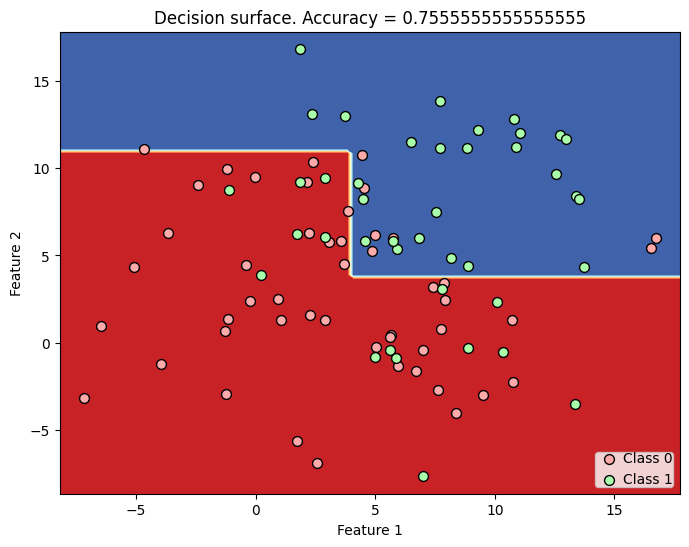

0.7555555555555555

In [69]:


# Train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X, y)

clf2 = DecisionTreeClassifier(max_depth=20, random_state=0)
clf2.fit(X, y)


# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_colors = ['#FFAAAA', '#AAFFAA']

# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel='Feature 1',
    ylabel='Feature 2',
)

# Plot the training points
for i, color in zip(range(2), plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=color,
        label=f'Class {i}',
        edgecolor="black",
        s=50,
    )

plt.title("Decision surface. Accuracy = " + str(accuracy_score(y, clf.predict(X))
))
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()
accuracy_score(y, clf.predict(X))
accuracy_score(y, clf.predict(X))



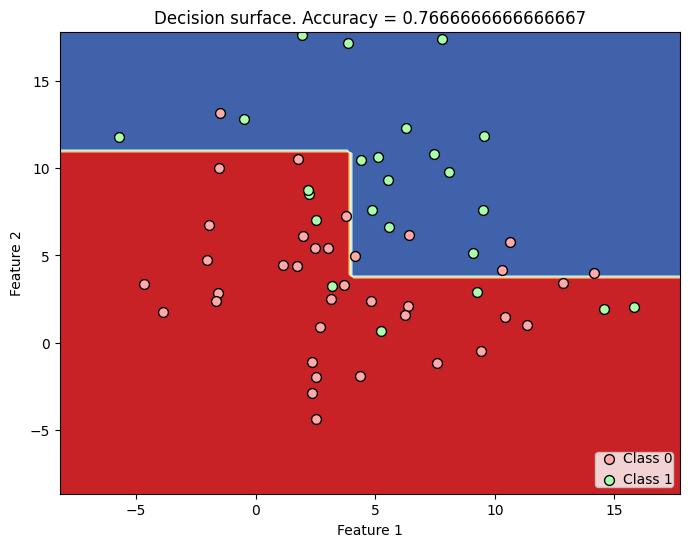

0.7555555555555555

In [70]:

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 6))
plot_colors = ['#FFAAAA', '#AAFFAA']

# Plot the decision boundary
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.RdYlBu,
    response_method="predict",
    ax=ax,
    xlabel='Feature 1',
    ylabel='Feature 2',
)

# Plot the training points
for i, color in zip(range(2), plot_colors):
    idx = np.where(y_test == i)
    plt.scatter(
        X_test[idx, 0],
        X_test[idx, 1],
        c=color,
        label=f'Class {i}',
        edgecolor="black",
        s=50,
    )

plt.title("Decision surface. Accuracy = " + str(accuracy_score(y_test, clf.predict(X_test))
))
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()
accuracy_score(y, clf.predict(X))



In [71]:
accuracy_score(y, clf2.predict(X)), accuracy_score(y_test, clf2.predict(X_test))

(1.0, 0.6333333333333333)